# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [22]:
import torch
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [23]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
import random
import numpy as np

validation_ratio=0.2
batch_size=32

train_loc='data/landmark_images/train'
test_loc='data/landmark_images/test'

train_x = transforms.Compose([transforms.Resize((224,224)), 
                              transforms.RandomHorizontalFlip(),   
                              transforms.ToTensor(), 
                              transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])])


test_x = transforms.Compose([transforms.Resize((224,224)), 
                             transforms.ToTensor(),         
                             transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])])

train_data = datasets.ImageFolder(train_loc, transform=train_x)
test_data = datasets.ImageFolder(test_loc, transform=test_x)



inpsize = list(range(len(train_data)))
np.random.shuffle(inpsize)

split = int(np.floor(validation_ratio * len(train_data)))
train_splt, valid_splt = inpsize[split:], inpsize[:split]


train_sampler = SubsetRandomSampler(train_splt)
valid_sampler = SubsetRandomSampler(valid_splt)


train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 
The code resizes images to 224x224 because I have used VGG model below. The Images are augmented by using RandomHorizontalFlip because the number of classes may not be enough. I did not try without augmentation.


### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

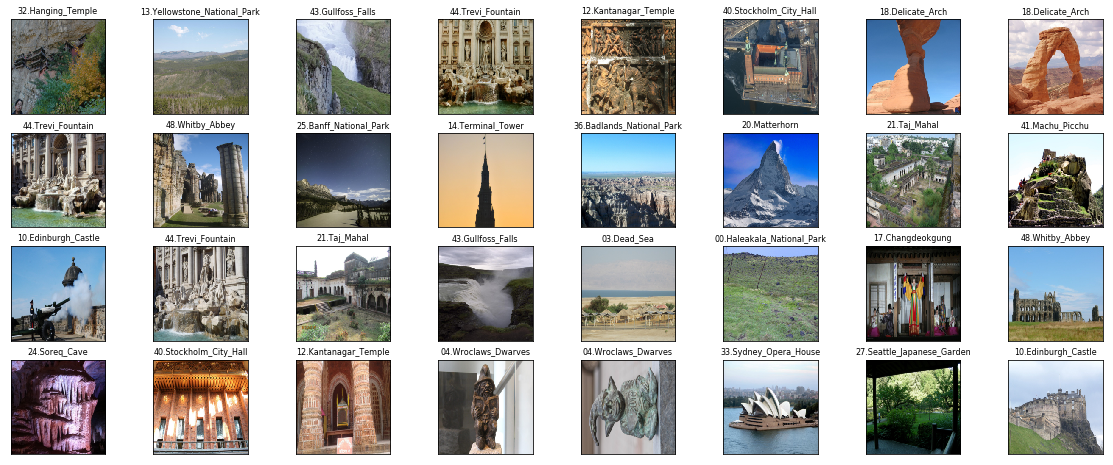

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)
         
def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0)))  

images, labels = next(iter(train_loader))

images = images.numpy() 

fig = plt.figure(figsize=(20, 8))

for idx, image in enumerate(images):
    implt = fig.add_subplot(4, 8, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    implt.set_title(train_data.classes[labels[idx]], wrap=True, fontdict={'fontsize':8});


### Initialize use_cuda variable

In [25]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [26]:
import torch.nn as nn
import torch.optim as optim

## TODO: select loss function

criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    return optim.Adam(model.parameters(), lr=0.001)
    
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [27]:
import torch.nn.functional as F

# define the CNN architecture

class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(14*14*128, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 50)
        self.drop = nn.Dropout(p=0.2)
    
    def forward(self, x):
        ## Define forward behavior

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 14*14*128)
        
        x = self.drop(x)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = F.relu(self.fc2(x))
        x = self.drop(x)
        x = self.fc3(x)
        
        return x
        

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  
I used Udacity Course's "cifar10_cnn_augmentation" as a starting point (in quotes below)- 
"The more convolutional layers you include, the more complex patterns in color and shape a model can detect. It's suggested that your final model include 2 or 3 convolutional layers."

I added one more layer, so 4 convolutional layers, Maxpooling with 2x2 with the usual Linear + Dropout layers to avoid overfitting. Layers use ReLU activation. I adjusted the Learning rates from .00001 to .01 and found .001 to be optimal. I found that 20 epochs to be sufficient, Validation Loss minimized much earlier than 20.

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [28]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output,target)
            loss.backward()
            optimizer.step()
            
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            train_loss+= ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss+= ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
               
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [29]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        f = m.in_features
        y = 1.0/np.sqrt(f)
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)
        
#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(15, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.909386 	Validation Loss: 3.882457
Validation loss decreased (inf --> 3.882457).  Saving model ...
Epoch: 2 	Training Loss: 3.790686 	Validation Loss: 3.685083
Validation loss decreased (3.882457 --> 3.685083).  Saving model ...
Epoch: 3 	Training Loss: 3.643537 	Validation Loss: 3.560374
Validation loss decreased (3.685083 --> 3.560374).  Saving model ...
Epoch: 4 	Training Loss: 3.463269 	Validation Loss: 3.345823
Validation loss decreased (3.560374 --> 3.345823).  Saving model ...
Epoch: 5 	Training Loss: 3.232667 	Validation Loss: 3.231845
Validation loss decreased (3.345823 --> 3.231845).  Saving model ...
Epoch: 6 	Training Loss: 3.021336 	Validation Loss: 3.024499
Validation loss decreased (3.231845 --> 3.024499).  Saving model ...
Epoch: 7 	Training Loss: 2.759669 	Validation Loss: 2.956920
Validation loss decreased (3.024499 --> 2.956920).  Saving model ...
Epoch: 8 	Training Loss: 2.496306 	Validation Loss: 2.878468
Validation loss decreased (2.95692

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [30]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 20

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.892968 	Validation Loss: 3.810999
Validation loss decreased (inf --> 3.810999).  Saving model ...
Epoch: 2 	Training Loss: 3.718479 	Validation Loss: 3.645700
Validation loss decreased (3.810999 --> 3.645700).  Saving model ...
Epoch: 3 	Training Loss: 3.568110 	Validation Loss: 3.477637
Validation loss decreased (3.645700 --> 3.477637).  Saving model ...
Epoch: 4 	Training Loss: 3.421774 	Validation Loss: 3.329919
Validation loss decreased (3.477637 --> 3.329919).  Saving model ...
Epoch: 5 	Training Loss: 3.305418 	Validation Loss: 3.281720
Validation loss decreased (3.329919 --> 3.281720).  Saving model ...
Epoch: 6 	Training Loss: 3.147666 	Validation Loss: 3.199655
Validation loss decreased (3.281720 --> 3.199655).  Saving model ...
Epoch: 7 	Training Loss: 3.005815 	Validation Loss: 3.121384
Validation loss decreased (3.199655 --> 3.121384).  Saving model ...
Epoch: 8 	Training Loss: 2.874594 	Validation Loss: 3.138762
Epoch: 9 	Training Loss: 2.716380 

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [31]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.891787


Test Accuracy: 29% (370/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [32]:
### TODO: Write data loaders for training, validation, and test sets

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [33]:
## TODO: select loss function

criterion_transfer = nn.CrossEntropyLoss()

def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    return optim.Adam(model[1][2].parameters(), lr=0.001) 
    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [34]:
## TODO: Specify model architecture
from torchvision import models

vgg_model = models.vgg19(pretrained=True)

for param in vgg_model.parameters():
    param.requires_grad = False
    
model_transfer = nn.Sequential()

model_transfer.add_module('vgg19', vgg_model)

model_transfer.add_module('features', nn.Sequential(nn.ReLU(inplace=True), nn.Dropout(p=0.5), nn.Linear(1000,50)))
print(model_transfer) 

#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

Sequential(
  (vgg19): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace)
      (16): Conv2d(256, 256, kernel_size=(3,

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  
Udacity course content suggested the following reading where VGG-19 was trained for Deep Image Representations.
https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf

In the "Style_Transfer_Solution.ipynb" exercise, we only needed the Feature portion whose weights were freezed. Here we are freezing features and classifier. The usual Linear + Dropout (0.5) to avoid overfitting. We train a layer with 1000 * 50 weights (Linear(in_features=1000, out_features=50, bias=True)) to improve training performance (to training the classifier again).

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [35]:
train(10, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer),
      criterion_transfer, use_cuda, 'model_transfer.pt')

#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.962278 	Validation Loss: 1.856960
Validation loss decreased (inf --> 1.856960).  Saving model ...
Epoch: 2 	Training Loss: 1.963552 	Validation Loss: 1.625499
Validation loss decreased (1.856960 --> 1.625499).  Saving model ...
Epoch: 3 	Training Loss: 1.820885 	Validation Loss: 1.529423
Validation loss decreased (1.625499 --> 1.529423).  Saving model ...
Epoch: 4 	Training Loss: 1.653052 	Validation Loss: 1.479319
Validation loss decreased (1.529423 --> 1.479319).  Saving model ...
Epoch: 5 	Training Loss: 1.593988 	Validation Loss: 1.378218
Validation loss decreased (1.479319 --> 1.378218).  Saving model ...
Epoch: 6 	Training Loss: 1.516209 	Validation Loss: 1.438022
Epoch: 7 	Training Loss: 1.484467 	Validation Loss: 1.421354
Epoch: 8 	Training Loss: 1.450023 	Validation Loss: 1.495170
Epoch: 9 	Training Loss: 1.402515 	Validation Loss: 1.418233
Epoch: 10 	Training Loss: 1.410926 	Validation Loss: 1.395884


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [36]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.296013


Test Accuracy: 68% (860/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [37]:
import cv2
from PIL import Image

def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    image = Image.open(img_path)
    
    transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.ToTensor()])
                                    
    image= transform(image)
    image.unsqueeze_(0)
  
    if use_cuda:
        image = image.cuda()
        
    model_transfer.eval()  
                                    
    output = model_transfer(image)
    _, index = torch.topk(output.squeeze(0),k)
    class_list = (train_loader.dataset.classes).copy()
    class_list = [x[3:].replace('_',' ') for x in class_list]
    return [class_list[i] for i in index]

# test on a sample image
print ( predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5) )

['Sydney Harbour Bridge', 'Forth Bridge', 'Eiffel Tower', 'Monumento a la Revolucion', 'Brooklyn Bridge']


### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

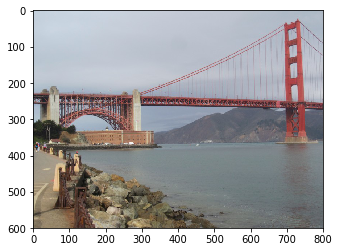

This could be "Forth Bridge" or "Sydney Harbour Bridge" or "Golden Gate Bridge"


In [38]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions

    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    print('This could be "{}" or "{}" or "{}"'.format(predicted_landmarks[0], predicted_landmarks[1],
                                                            predicted_landmarks[2]))
    
# test on a sample image
suggest_locations('data/landmark_images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Did not find any issues with the model's accuracy - but we can ...

1. Train with more Input Data will help identify complex noisy images.

2. I have used VGG, i have not played around with Resnet. SO I couldn't say it will yield better results. Either ResNet or adding layers to the existing VGG-19, wiht more diverse range of Input images, could be a point for Improvement.

3. For the same reasons, we could explore with some of the values used in the model such as higher learning rate with more epochs; learn the statistical parameters from processing the previous batch as discussed in the Video content


Grand_Canyon/0bc1248baee36e80.jpg


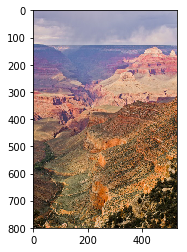

This could be "Grand Canyon" or "Death Valley National Park" or "Badlands National Park"

Sydney_Opera_House/2b7defd72658f7ad.jpg


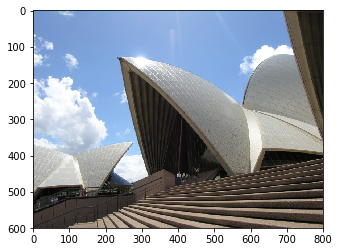

This could be "Sydney Opera House" or "Monumento a la Revolucion" or "Petronas Towers"

Mount_Rushmore_National_Memorial/79e3f90e1af82d33.jpg


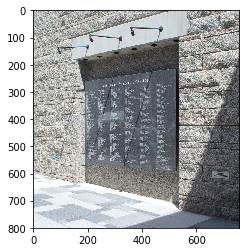

This could be "Washington Monument" or "Great Wall of China" or "Ljubljana Castle"

Yellowstone_National_Park/31b3206fc00eaf38.jpg


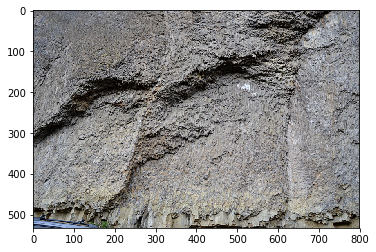

This could be "Death Valley National Park" or "Badlands National Park" or "Great Wall of China"

Banff_National_Park/7dfe634f89117a3b.jpg


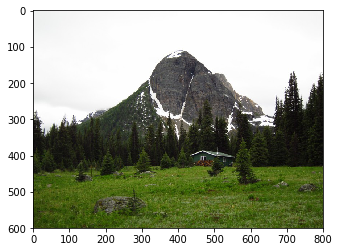

This could be "Banff National Park" or "Externsteine" or "Mount Rainier National Park"


In [40]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.
import os 

def get_random_images(home_path, num_imgs):
    files = []
    
    while len(files)<num_imgs:
        loc = random.choice(os.listdir(home_path))
        newdir = home_path+'/'+loc
        file = random.choice(os.listdir(newdir))
        finalloc = newdir+'/'+file
        
        if os.path.isfile(finalloc)==True and finalloc[-3:]=='jpg':
            files.append(finalloc)
    
    return files

imgs = get_random_images('data/landmark_images/test',5)

for file in imgs:
    print('\n'+file[29:])
    suggest_locations(file)
     